4/10/24

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
os.chdir('C:\\Users\\Vidhya\\Documents\\Python\\Desktop\\Edubridge\\Python\\Datasets')

In [3]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop('Cabin',axis=1,inplace=True)

In [7]:
df['Age'].fillna(29.69,inplace=True)

In [8]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
df['Embarked'].fillna('S',inplace=True)

In [10]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
gender_count=df['Sex'].value_counts()
gender_count

male      577
female    314
Name: Sex, dtype: int64

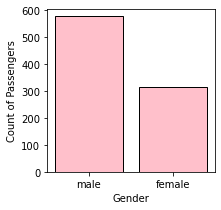

In [12]:
fig=plt.figure(figsize=(3,3))
plt.bar(gender_count.index,gender_count.values,color='pink',edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count of Passengers')
plt.show()

In [13]:
sur_count=df.Survived.value_counts()
sur_count

0    549
1    342
Name: Survived, dtype: int64

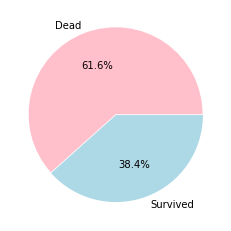

In [14]:
plt.pie(sur_count.values,labels=['Dead','Survived'],autopct='%1.1f%%',colors=['pink','lightblue'],explode=[0.01,0])
plt.show()

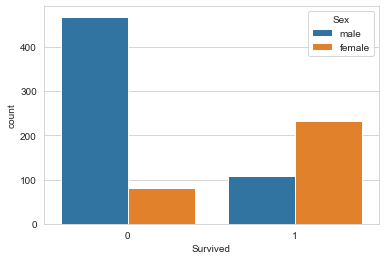

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)
plt.show()

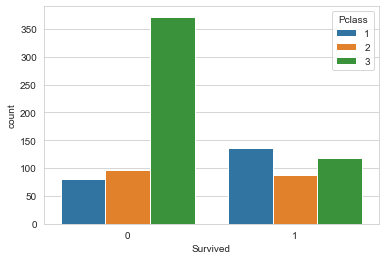

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.show()

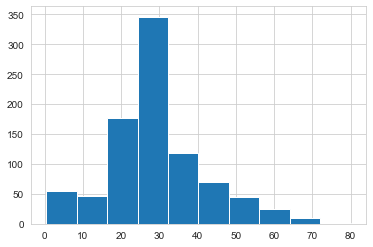

In [17]:
plt.hist(df['Age'])
plt.show()

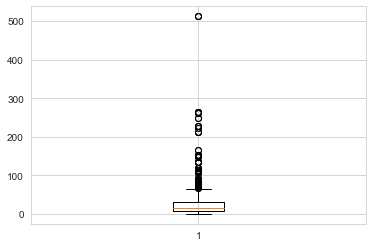

In [18]:
plt.boxplot(df['Fare'])
plt.show()

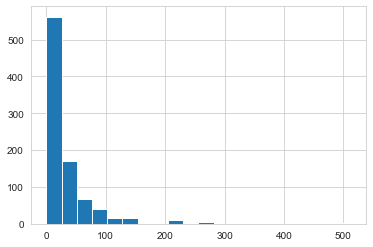

In [19]:
plt.hist(df.Fare,bins=20)
plt.show()

In [20]:
print('The average ticket fare is',np.mean(df.Fare))

The average ticket fare is 32.2042079685746


In [21]:
one=np.mean(df['Fare'][df['Pclass']==1])
print(one)
print('===================================')
two=np.mean(df['Fare'][df['Pclass']==2])
print(two)
print('===================================')
three=np.mean(df['Fare'][df['Pclass']==3])
print(three)

84.15468749999992
20.66218315217391
13.675550101832997


In [22]:
#or using groupby
avg_fares=df.groupby('Pclass')['Fare'].mean()

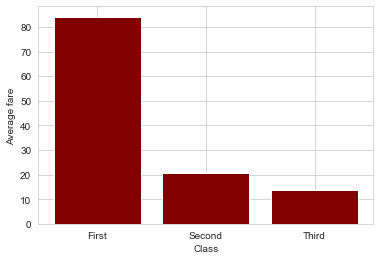

In [23]:
plt.bar(['First','Second','Third'],avg_fares.values,color='maroon')
plt.xlabel('Class')
plt.ylabel('Average fare')
plt.show()

In [24]:
#encoding- converting categorical variable to numerical varible

#could use dummy variable as well but we would have to delete extra columns, its a hassle

In [25]:
#encoding Sex column
from sklearn.preprocessing import LabelEncoder

In [26]:
encode=LabelEncoder()
df['Sex']=encode.fit_transform(df['Sex']) #1 is male, 0 is female

In [27]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [28]:
X=df[['Pclass','Sex','Age','Fare']]
y=df['Survived']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [32]:
y_pred=model.predict(X_test)

In [33]:
y_pred[0:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

In [34]:
y_test

389    1
615    1
856    1
39     1
280    0
      ..
883    0
282    0
474    0
514    0
589    0
Name: Survived, Length: 179, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score
print('The percentage accuracy of model is',accuracy_score(y_test,y_pred)*100)

#accuracy_score is to be used when variables are categorical
#accuracy_score tells abt how good is the model predicting the values similar to y_test values(actual values) i.e. predicting the right/nearest values
#below 80% or 85% the model is not good
#below 85% is still okay

The percentage accuracy of model is 76.53631284916202


In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)


#array([[E1,E2],[E3,E4]])
#diagonal elements (E1)-99(has actually survived and also predicted survived) and (E4)-17(is actually dead and also predicted dead) are rightly classified i.e. 99+17=116, these are predicted rightly
#diagonal elements (E2)-17(actually dead but predicted survived) and (E3)-20(actually survived but predicted dead) are wrongly classified i.e. 17+20=37
#so E1+E2+E3+E4=153 values are predicted in the model irrespective of rightly or wrongly being predicted
#out of 179(X_test.shape), 153 are predicted and 26 are not predicted
#116/153=0.7581 i.e. 75% of the values is predicted rightly

array([[78, 20],
       [22, 59]], dtype=int64)

In [37]:
X_test.shape

(179, 4)

8/10/24

Decision Tree Classifier


--very important becoz of its simplicity and ease of understanding
--it has high accuracy
--it is prone to overfitting
--it mimics human decision making process

In [38]:
#shld use Logistic Regression when target variable has only 2 output
#shld use Decision Tree Classifier when target variable has more than 2 output

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model=DecisionTreeClassifier() #max_depth=
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [41]:
y_pred=model.predict(X_test)
print('The accuracy od Decision Tree is',accuracy_score(y_test,y_pred)*100)

The accuracy od Decision Tree is 78.2122905027933


In [42]:
confusion_matrix(y_test,y_pred)

array([[85, 13],
       [26, 55]], dtype=int64)

In [43]:
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred)*100)

In [44]:
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])

Accuracy of decision Tree with depth 1 is 74.86033519553072
Accuracy of decision Tree with depth 2 is 74.86033519553072
Accuracy of decision Tree with depth 3 is 74.86033519553072
Accuracy of decision Tree with depth 4 is 75.97765363128491
Accuracy of decision Tree with depth 5 is 76.53631284916202
Accuracy of decision Tree with depth 6 is 75.97765363128491
Accuracy of decision Tree with depth 7 is 78.77094972067039
Accuracy of decision Tree with depth 8 is 79.3296089385475
Accuracy of decision Tree with depth 9 is 77.6536312849162
Accuracy of decision Tree with depth 10 is 79.3296089385475
Accuracy of decision Tree with depth 11 is 79.88826815642457
Accuracy of decision Tree with depth 12 is 79.3296089385475


In [45]:
#With Entropy
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred)*100)
    
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])

Accuracy of decision Tree with depth 1 is 74.86033519553072
Accuracy of decision Tree with depth 2 is 74.86033519553072
Accuracy of decision Tree with depth 3 is 74.86033519553072
Accuracy of decision Tree with depth 4 is 74.86033519553072
Accuracy of decision Tree with depth 5 is 75.41899441340783
Accuracy of decision Tree with depth 6 is 75.41899441340783
Accuracy of decision Tree with depth 7 is 74.30167597765363
Accuracy of decision Tree with depth 8 is 74.30167597765363
Accuracy of decision Tree with depth 9 is 75.97765363128491
Accuracy of decision Tree with depth 10 is 75.41899441340783
Accuracy of decision Tree with depth 11 is 74.86033519553072
Accuracy of decision Tree with depth 12 is 74.86033519553072


In [46]:
#Entropy and Gini are both meaasures of Impurity

In [47]:
#With Gini
depth=[1,2,3,4,5,6,7,8,9,10,11,12]
accuracies=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='gini',max_depth=i)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracies.append(accuracy_score(y_test,y_pred)*100)
    
for i in range(len(depth)):
    print('Accuracy of decision Tree with depth',depth[i],'is',accuracies[i])

Accuracy of decision Tree with depth 1 is 74.86033519553072
Accuracy of decision Tree with depth 2 is 74.86033519553072
Accuracy of decision Tree with depth 3 is 74.86033519553072
Accuracy of decision Tree with depth 4 is 75.97765363128491
Accuracy of decision Tree with depth 5 is 76.53631284916202
Accuracy of decision Tree with depth 6 is 75.97765363128491
Accuracy of decision Tree with depth 7 is 79.3296089385475
Accuracy of decision Tree with depth 8 is 77.6536312849162
Accuracy of decision Tree with depth 9 is 77.6536312849162
Accuracy of decision Tree with depth 10 is 81.00558659217877
Accuracy of decision Tree with depth 11 is 79.88826815642457
Accuracy of decision Tree with depth 12 is 78.2122905027933


16/10/24

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
model=KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)*100

65.92178770949721

In [52]:
from sklearn.svm import SVC
model=SVC()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)*100

62.01117318435754

In [53]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)*100

74.30167597765363